In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df_train = pd.read_csv("../dataset/train_cleaned.csv")
df_train_target = df_train.pop("CO2 Emissions(g/km)")
df_train_id = df_train.pop("Id")

df_test = pd.read_csv("../dataset/test_cleaned.csv")
df_test_id = df_test.pop("Id")

<Axes: >

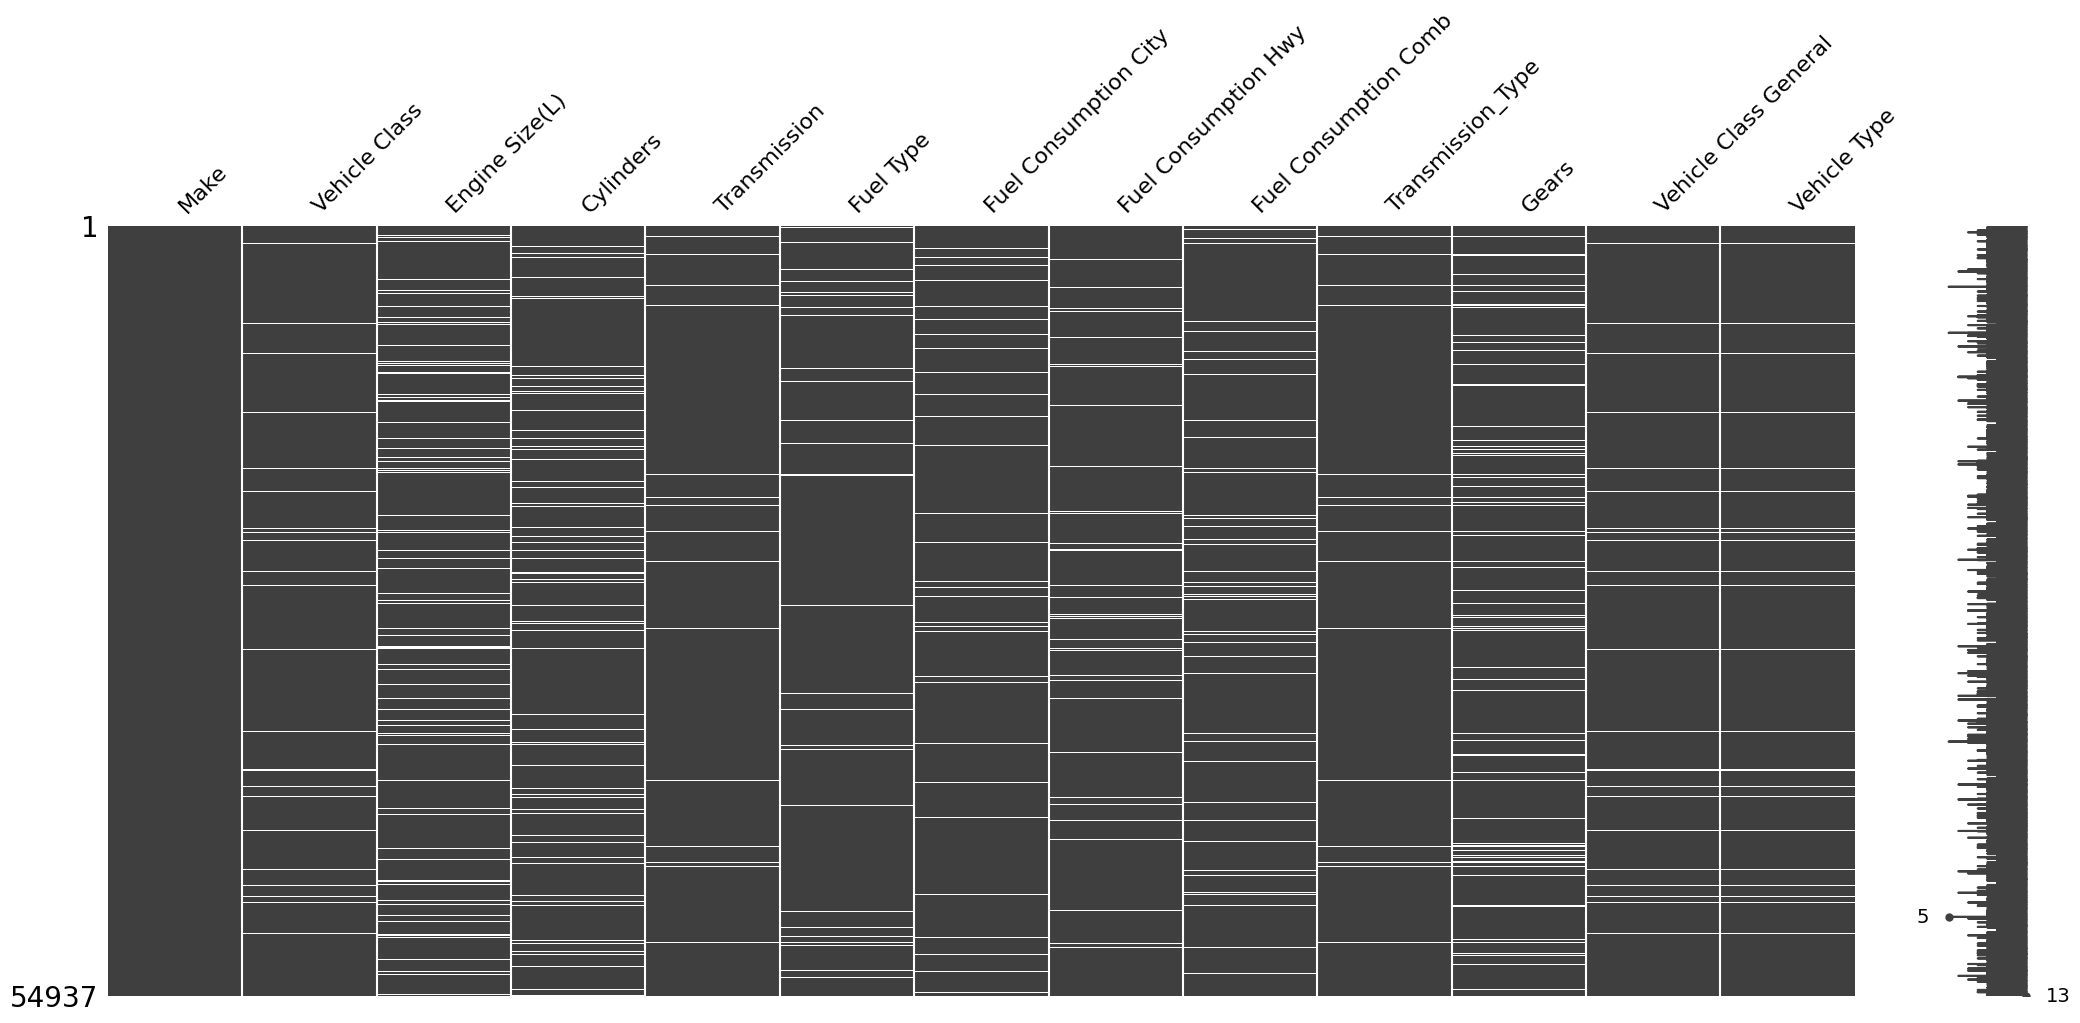

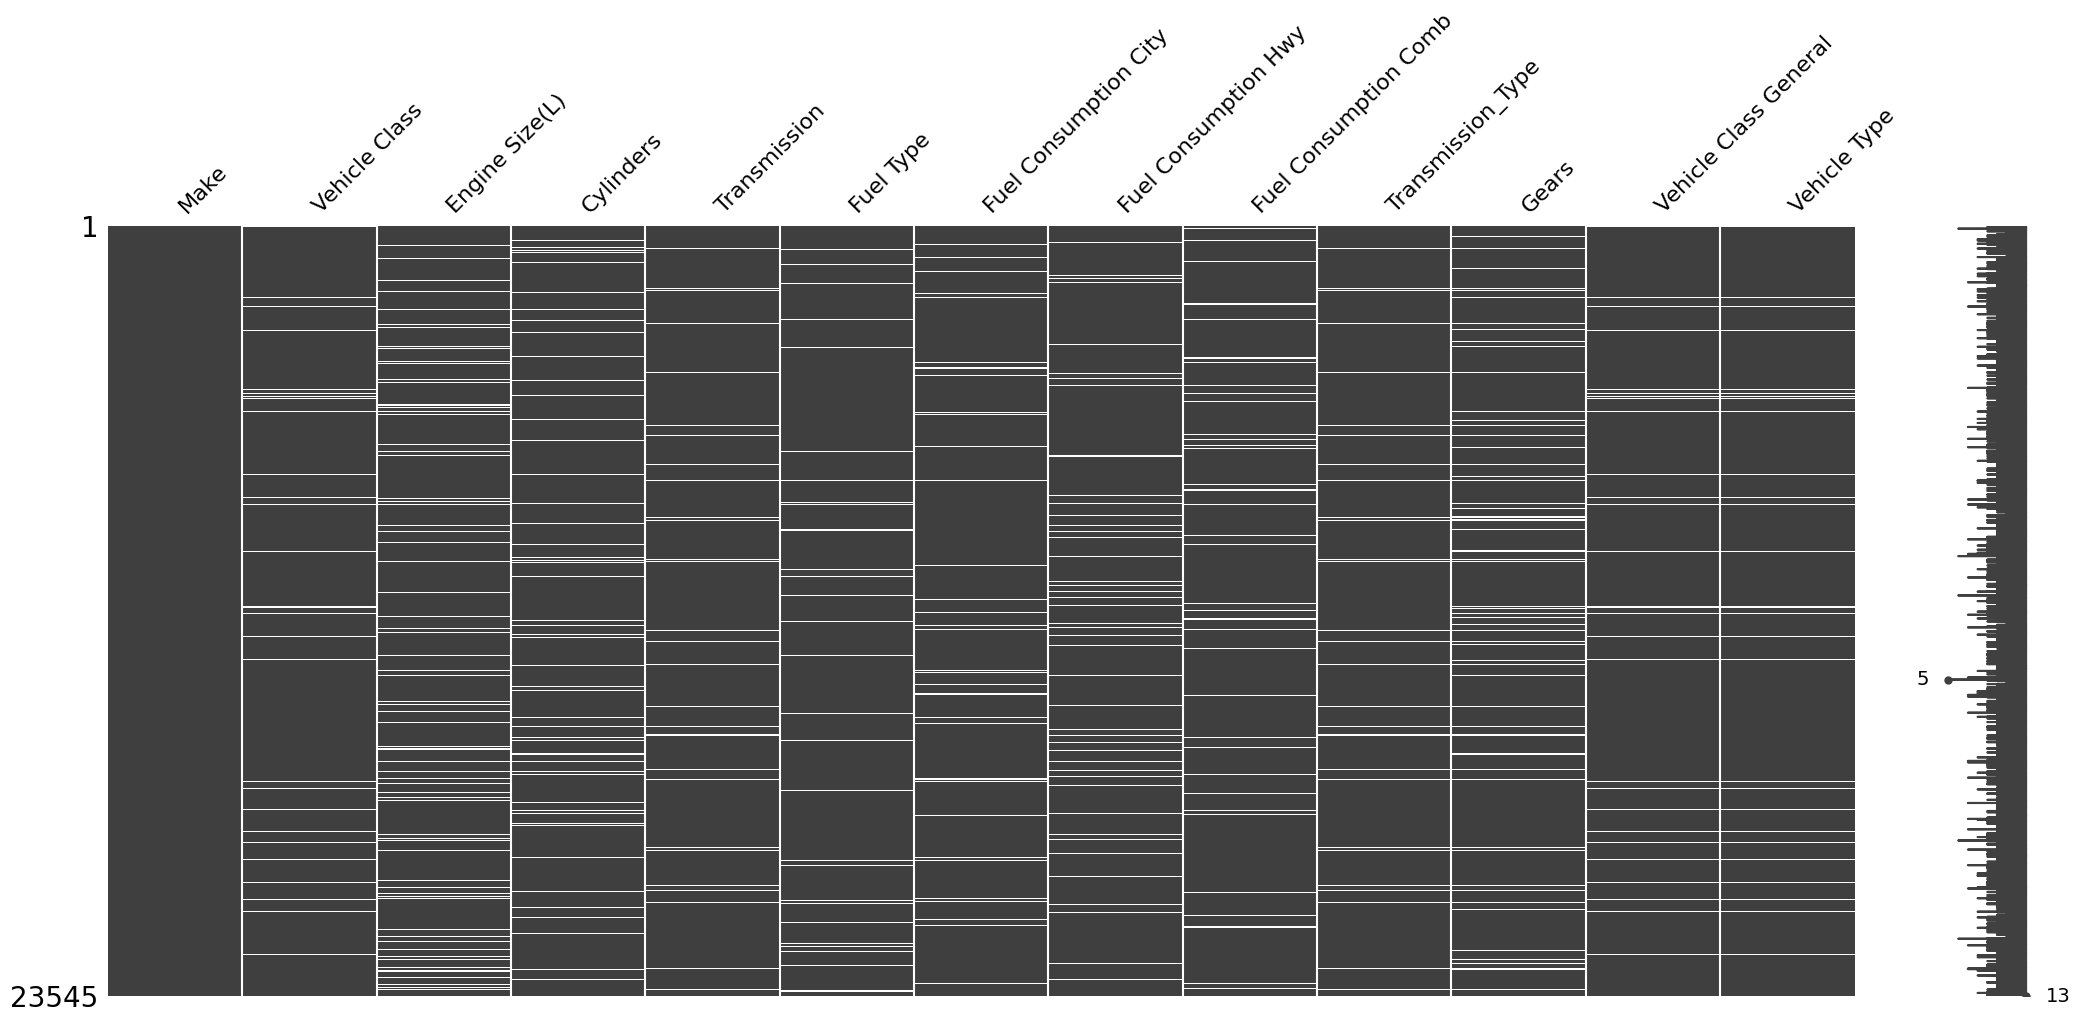

In [143]:
import missingno as msno

msno.matrix(df_train)
msno.matrix(df_test)

In [144]:
def find_rows_with_missing_values(
    df: pd.DataFrame, columns: list, n: int
) -> pd.DataFrame:
    return df[df[columns].isnull().sum(axis=1) >= n]

In [145]:
valid_columns = ["Make", "Vehicle Class", "Engine Size(L)", "Cylinders", "Transmission", "Fuel Type", "Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]

multiple_missing_train = find_rows_with_missing_values(
    df_train, valid_columns, 4
)
multiple_missing_test = find_rows_with_missing_values(
    df_test, valid_columns, 4
)

<Axes: >

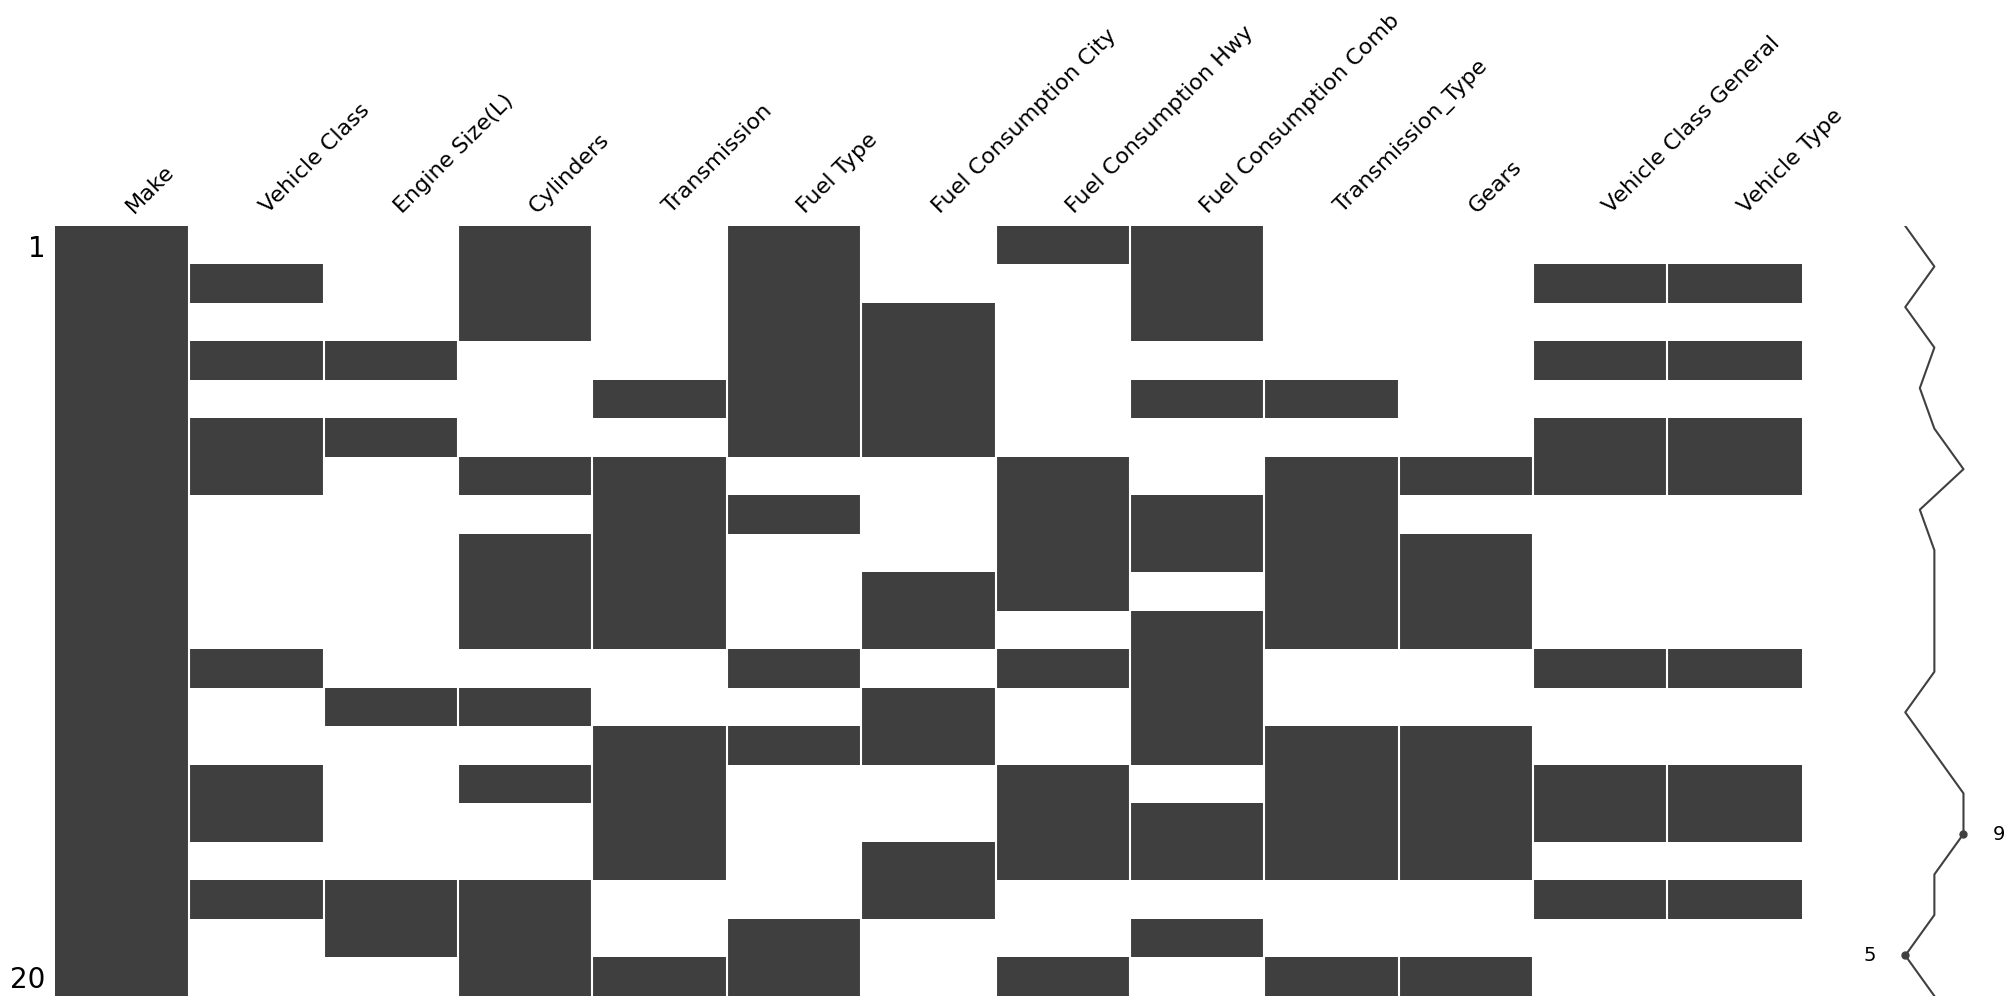

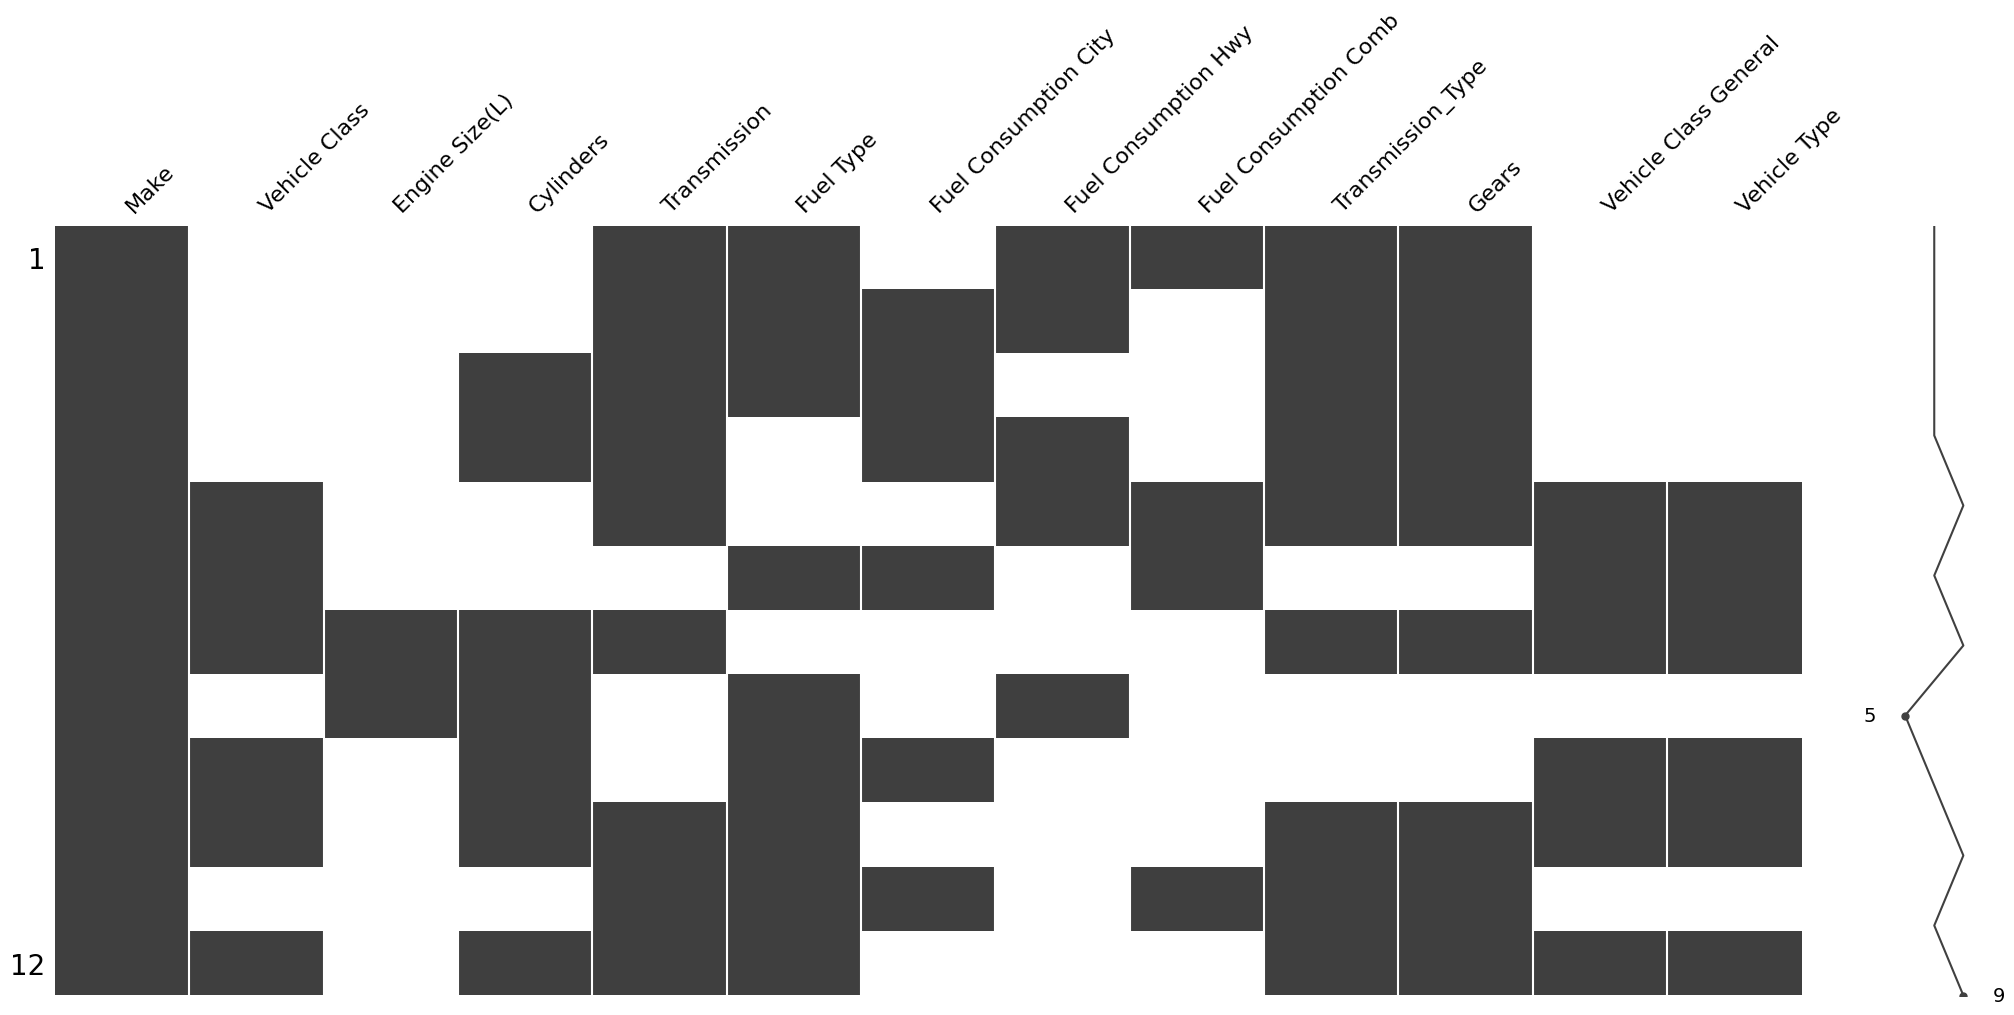

In [146]:
msno.matrix(multiple_missing_train)
msno.matrix(multiple_missing_test)

In [147]:
def calculate_iqr(df: pd.DataFrame, columns: list, multiplier: float):
    bounds = {}
    for column in columns:
        data = df[column].dropna()  # ignore NaN values
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        bounds[column] = (lower_bound, upper_bound)
    return bounds


def detect_outliers(df: pd.DataFrame, bounds: dict) -> pd.DataFrame:
    df["is_outlier"] = 0
    for column, (lower_bound, upper_bound) in bounds.items():
        df.loc[
            (df[column] < lower_bound) | (df[column] > upper_bound), "is_outlier"
        ] = 1
        print(
            f"Column: {column}, Number of Outliers: {sum((df[column] < lower_bound) | (df[column] > upper_bound))}"
        )
    return df

In [148]:
float_columns_df = df_train.select_dtypes(include=["float64"])

In [149]:
bounds = calculate_iqr(df_train, float_columns_df.columns, 1.5)
df_train = detect_outliers(df_train, bounds)
df_test = detect_outliers(df_test, bounds)

Column: Engine Size(L), Number of Outliers: 2005
Column: Cylinders, Number of Outliers: 540
Column: Fuel Consumption City, Number of Outliers: 479
Column: Fuel Consumption Hwy, Number of Outliers: 1578
Column: Fuel Consumption Comb, Number of Outliers: 570
Column: Gears, Number of Outliers: 0
Column: Engine Size(L), Number of Outliers: 887
Column: Cylinders, Number of Outliers: 219
Column: Fuel Consumption City, Number of Outliers: 195
Column: Fuel Consumption Hwy, Number of Outliers: 683
Column: Fuel Consumption Comb, Number of Outliers: 243
Column: Gears, Number of Outliers: 0


In [150]:
df_train

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Transmission_Type,Gears,Vehicle Class General,Vehicle Type,is_outlier
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.904762,7.200000,9.800000,Automatic,8.0,SUV,SMALL,0
1,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,13.793103,9.700000,11.960000,Automatic,5.0,PICKUP TRUCK,SMALL,0
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.204082,7.299251,8.894238,Automatic,6.0,COMPACT,COMPACT,0
3,CHEVO,VAN - PASSENGER,NaN,8.0,A6,X,17.300000,11.700000,14.780000,Automatic,6.0,VAN,PASSENGER,0
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,7.899357,8.010000,Manual,6.0,COMPACT,COMPACT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54932,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.900000,8.802817,10.505341,Automatic,10.0,SUBCOMPACT,SUBCOMPACT,1
54933,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,21.000000,10.600000,16.323011,Manual,6.0,SUBCOMPACT,SUBCOMPACT,0
54934,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.200000,12.500000,15.630000,Automatic,7.0,TWO-SEATER,TWO-SEATER,0
54935,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.300000,9.900000,14.520000,Automatic,8.0,PICKUP TRUCK,STANDARD,1


In [151]:
df_test

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Transmission_Type,Gears,Vehicle Class General,Vehicle Type,is_outlier
0,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.200000,15.200000,14.645989,Automatic,10.0,PICKUP TRUCK,STANDARD,1
1,BMV,COMPACT,2.0,4.0,A8,Z,9.100000,6.499793,7.930364,Automatic,8.0,COMPACT,COMPACT,0
2,JIPU,SUV - SMALL,1.3,4.0,A9,X,10.201553,7.800000,9.120000,Automatic,9.0,SUV,SMALL,0
3,LECUS,SUV - SMALL,NaN,4.0,AS6,Z,NaN,8.899530,NaN,Automatic,6.0,SUV,SMALL,0
4,BARUSU,COMPACT,2.0,NaN,M6,Z,8.802817,7.099296,8.040000,Manual,6.0,COMPACT,COMPACT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,MITSU,SUV - SMALL,2.0,4.0,M5,X,NaN,7.501875,8.980000,Manual,5.0,SUV,SMALL,0
23541,CHEVO,COMPACT,1.4,4.0,M6,X,8.698764,5.500550,7.300000,Manual,6.0,COMPACT,COMPACT,0
23542,KIO,SUV - SMALL,NaN,4.0,AS6,X,11.600000,8.400000,10.162602,Automatic,6.0,SUV,SMALL,0
23543,JIPU,SUV - SMALL,2.4,4.0,A9,X,10.504202,8.400000,9.600000,Automatic,9.0,SUV,SMALL,0


In [152]:
df_temp = df_train.join(df_train_target)
df_temp

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Transmission_Type,Gears,Vehicle Class General,Vehicle Type,is_outlier,CO2 Emissions(g/km)
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.904762,7.200000,9.800000,Automatic,8.0,SUV,SMALL,0,208
1,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,13.793103,9.700000,11.960000,Automatic,5.0,PICKUP TRUCK,SMALL,0,325
2,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.204082,7.299251,8.894238,Automatic,6.0,COMPACT,COMPACT,0,170
3,CHEVO,VAN - PASSENGER,NaN,8.0,A6,X,17.300000,11.700000,14.780000,Automatic,6.0,VAN,PASSENGER,0,362
4,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,7.899357,8.010000,Manual,6.0,COMPACT,COMPACT,0,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54932,CHEVO,SUBCOMPACT,6.2,8.0,AS10,Z,11.900000,8.802817,10.505341,Automatic,10.0,SUBCOMPACT,SUBCOMPACT,1,318
54933,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,21.000000,10.600000,16.323011,Manual,6.0,SUBCOMPACT,SUBCOMPACT,0,303
54934,FOLD,TWO-SEATER,3.5,6.0,AM7,Z,18.200000,12.500000,15.630000,Automatic,7.0,TWO-SEATER,TWO-SEATER,0,410
54935,CHEVO,PICKUP TRUCK - STANDARD,6.2,8.0,A8,Z,18.300000,9.900000,14.520000,Automatic,8.0,PICKUP TRUCK,STANDARD,1,466


c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


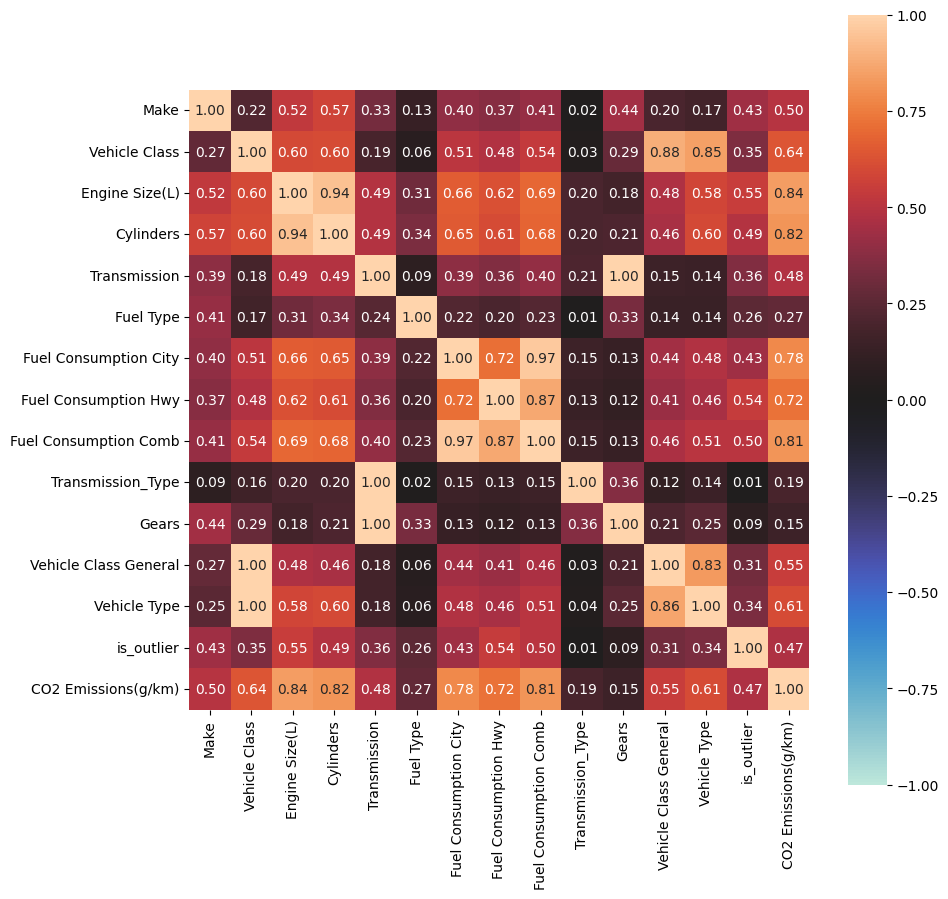

In [153]:
from dython.nominal import associations

associations(
    df_temp,
    nom_nom_assoc="theil",
    plot=True,
    nan_strategy="drop_samples",
    # clustering=True,
    figsize=(10, 10),
)
print()

In [154]:
df_train.insert(0, "Id", df_train_id)
df_train = pd.concat([df_train, df_train_target], axis=1)

df_test.insert(0, "Id", df_test_id)

df_train.to_csv("../dataset/train_cleaned_outliers.csv", index=False)
df_test.to_csv("../dataset/test_cleaned_outliers.csv", index=False)